In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
X = digits.data

In [8]:
Y = digits.target

In [9]:
X.shape

(1797, 64)

In [10]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Costruiamo le immagini per ogni numero

### Selezioniamo solo la riga corrente

#### Prendiamo la riga e la trasformiamo in una matrice 8x8

In [46]:
X[Y==1][0].shape

(64,)

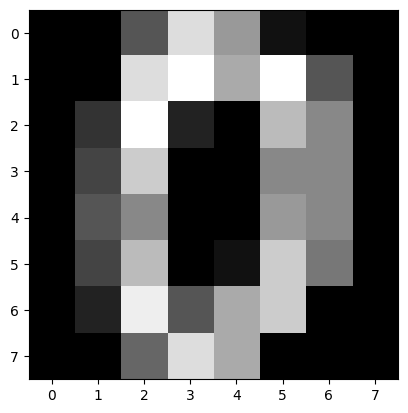

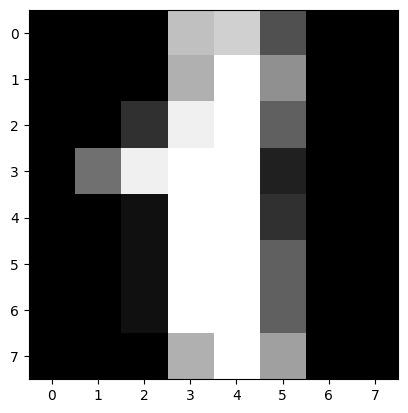

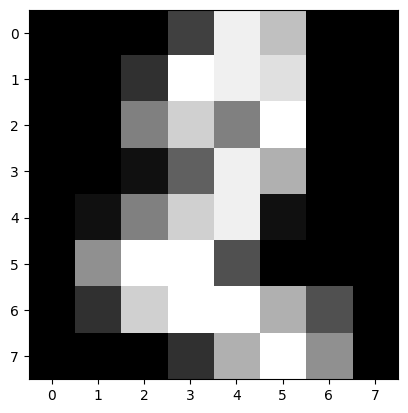

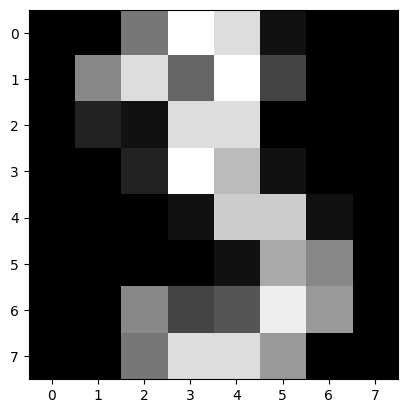

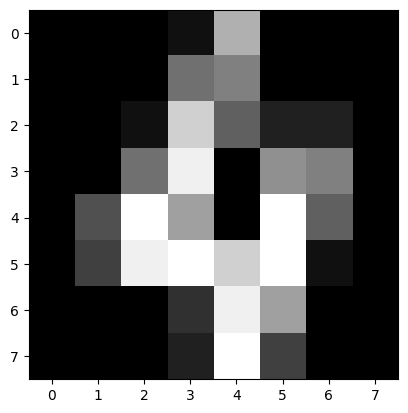

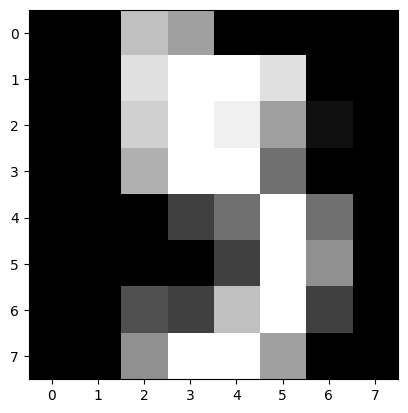

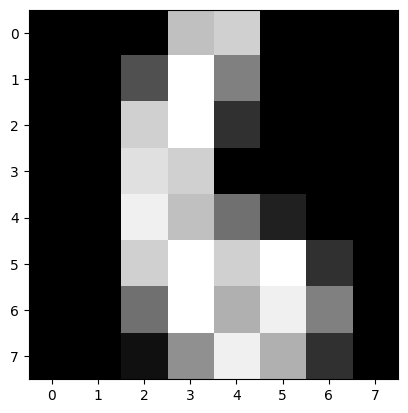

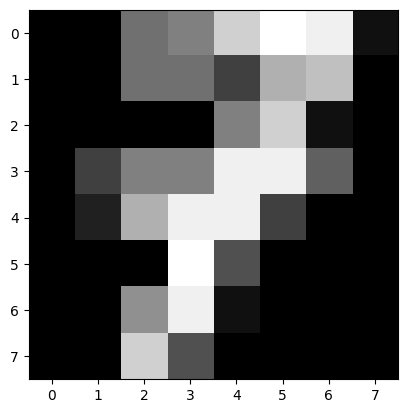

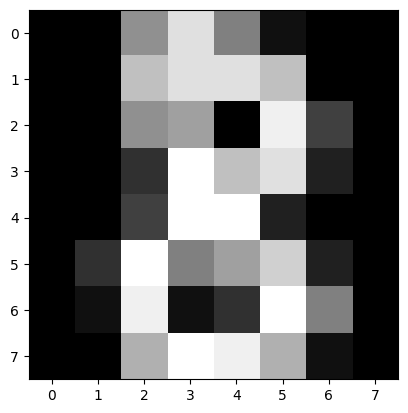

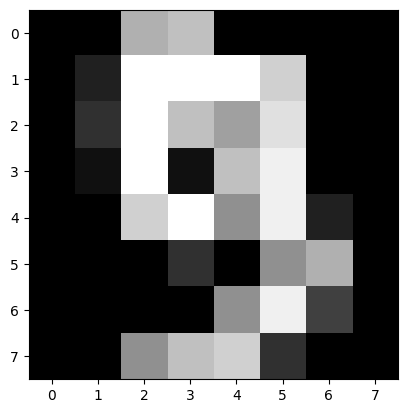

In [12]:
for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape([8,8])
    plt.imshow(pic_matrix, cmap="gray")
    plt.show()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [14]:
from sklearn.preprocessing import MinMaxScaler

### Normalizzazione [0,1]

In [15]:
mms = MinMaxScaler()

In [16]:
X_train = mms.fit_transform(X_train)

In [17]:
X_test = mms.transform(X_test)

## La Reg. Logistica riconosce che è una Multiclasse

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [20]:
Y_pred = lr.predict(X_test)

In [21]:
Y_pred_proba = lr.predict_proba(X_test)

In [22]:
print("ACCURACY="+str(accuracy_score(Y_test,Y_pred)))

ACCURACY=0.9611111111111111


In [23]:
print("LOG LOSS="+str(log_loss(Y_test, Y_pred_proba)))

LOG LOSS=0.17742767355144476


## Metrica Matrice di Confusione, Su quali classi il modello ha commeso piu errori

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(Y_test, Y_pred)

## Colonne = Classi predette | Righe = Classi Corrette

In [27]:
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  2, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 51,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 57,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]])

In [28]:
import seaborn as sns

Text(0.5, 137.22222222222217, 'Classe Predetta')

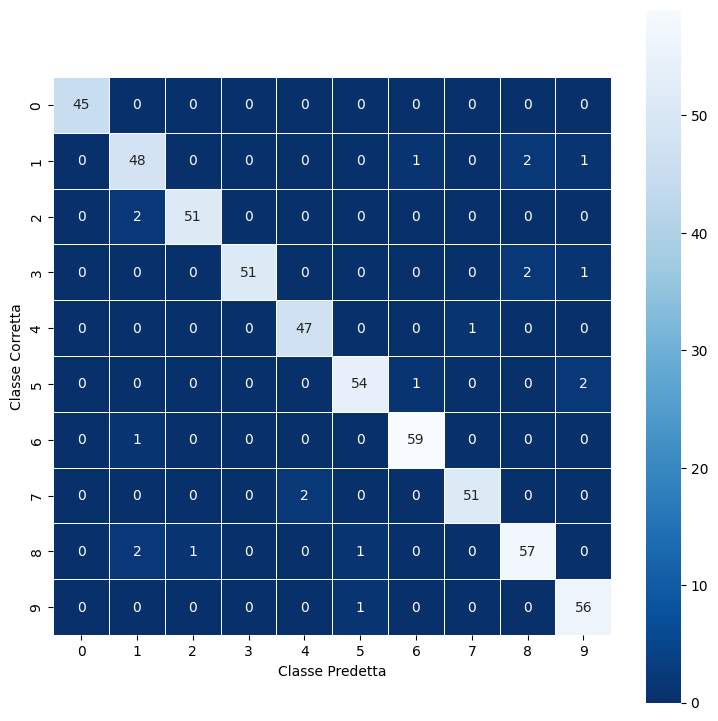

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, cmap="Blues_r", linewidths=.5, square=True)
plt.ylabel("Classe Corretta")
plt.xlabel("Classe Predetta")

## Altro Modello per OneVsRest 

In [32]:
from sklearn.multiclass import OneVsRestClassifier

In [34]:
ovr = OneVsRestClassifier(LogisticRegression())

In [35]:
ovr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [36]:
Y_pred = ovr.predict(X_test)

In [38]:
Y_pred_proba = ovr.predict_proba(X_test)

In [39]:
print("ACCURACY="+str(accuracy_score(Y_test,Y_pred)))
print("LOG LOSS="+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY=0.9555555555555556
LOG LOSS=0.2288042340671377
